# HPO Gene Set Enrichment Analyze Example

This is an example of using my toolkit to do the [HPO](https://hpo.jax.org/) GSEA.

About the toolkit installation, see the [GitHub repo](https://github.com/Nanguage/BioTMCourse/tree/master/HPO%20enrich).

### Data: input gene list

In this example, we use the sex-associated genes as input example, it's download from the [SAGD database](http://bioinfo.life.hust.edu.cn/SAGD#!/download).
Data group [SAGD_00055](http://bioinfo.life.hust.edu.cn/static/SAGD/download/Homo_sapiens/SAGD_00055.csv)(human hypothalamus tissue) is selected as input.

In [26]:
# load required modules

import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import show
from bokeh.io import output_notebook
output_notebook()

from hpoea.enrich import GSEA
from hpoea.plot import LineagePlot, dot_plot

Loading BokehJS ...

## Data loading and preprocessing

Read input differential gene experission result table.

In [3]:
input_csv = "../data/SAGD_00055.csv"
exp = pd.read_csv(input_csv)
exp.columns = ["ensembl_id"] + list(exp.columns)[1:]

In [5]:
exp.head(3)

,ensembl_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,FPKM_M,FPKM_F
0,ENSG00000012817,850.482453,8.188046,0.218044,37.552216,0.0,0.0,6.015774,0.020867
1,ENSG00000067048,908.726851,8.637194,0.215148,40.145376,0.0,0.0,10.234487,0.026688
2,ENSG00000129824,1493.628628,8.147712,0.208643,39.050981,0.0,0.0,39.948216,0.155030


Select the significant differential expressed genes with condition: padj <= 0.05

In [10]:
sig = exp[exp.padj <= 0.05]
test_genes = list(sig.ensembl_id)
len(test_genes)

54

Total 54 genes was selected, here is the gene list:

In [13]:
for i in range(len(test_genes)//5 + 1):
    print(" ".join(test_genes[i*5:(i+1)*5]))

ENSG00000012817 ENSG00000067048 ENSG00000129824 ENSG00000114374 ENSG00000131002
ENSG00000198692 ENSG00000165246 ENSG00000183878 ENSG00000229807 ENSG00000233864
ENSG00000099725 ENSG00000067646 ENSG00000099715 ENSG00000176728 ENSG00000154620
ENSG00000260197 ENSG00000206159 ENSG00000241859 ENSG00000278847 ENSG00000273906
ENSG00000227289 ENSG00000228764 ENSG00000232226 ENSG00000229236 ENSG00000169953
ENSG00000225117 ENSG00000270641 ENSG00000092377 ENSG00000267793 ENSG00000232348
ENSG00000224060 ENSG00000229163 ENSG00000215580 ENSG00000002586 ENSG00000231535
ENSG00000227494 ENSG00000133048 ENSG00000258484 ENSG00000184895 ENSG00000233070
ENSG00000228787 ENSG00000005889 ENSG00000214717 ENSG00000135245 ENSG00000064886
ENSG00000215301 ENSG00000229238 ENSG00000147050 ENSG00000198535 ENSG00000130600
ENSG00000217896 ENSG00000126012 ENSG00000261600 ENSG00000169248


As we can see, the gene name is in Ensembl format, but HPO require Entrez format.
We convert them firstly.

In [14]:
from hpoea.utils.idconvert import EntrezEnsemblConvert
cvt = EntrezEnsemblConvert()
test_entrez = cvt.ensembl2entrez(test_genes)

hpoea.utils.idconvert INFO    @ 03/28/19 16:29:37: Perform gene ID conversion: from ensembl id to entrez id.


querying 1-54...done.


hpoea.utils.idconvert WARNING @ 03/28/19 16:29:39: 18 gene conversion failed, failed genes:
hpoea.utils.idconvert WARNING @ 03/28/19 16:29:39: ENSG00000176728,ENSG00000260197,ENSG00000206159,ENSG00000241859,ENSG00000278847,ENSG00000273906,ENSG00000227289,ENSG00000228764,ENSG00000232226,ENSG00000225117,ENSG00000267793,ENSG00000232348,ENSG00000224060,ENSG00000229163,ENSG00000227494,ENSG00000229238,ENSG00000217896,ENSG00000261600


Finished.


Unfortunatlly, 18 genes was lost during the conversion process. 

## GSEA

In [16]:
gsea = GSEA()
gsea.enrich(test_entrez)
gsea.multiple_test_corretion(method='fdr_bh')

hpoea.enrich         INFO    @ 03/28/19 16:41:40: Perform gene set enrichment analyze.
hpoea.enrich         INFO    @ 03/28/19 16:41:40: input genes: 36	possible terms: 315
100%|██████████| 315/315 [00:05<00:00, 61.13it/s]
hpoea.enrich         INFO    @ 03/28/19 16:41:45: Done
hpoea.enrich         INFO    @ 03/28/19 16:41:45: Multiple test correction with fdr_bh method.
hpoea.enrich         INFO    @ 03/28/19 16:41:45: Done


In [21]:
gsea.enrichment_table.head(1)

,HPO_term_ID,HPO_term_name,gene_num,study_count,n_study,population_count,n_population,gene_ratio,background_ratio,odd_ratio,pvalue,padj,related_genes
55,HP:0001450,Y-linked inheritance,17,4,390,17,138809,0.010256,0.000122,83.746003,1.418778e-07,0.000045,KDM5D USP9Y DDX3Y PRY2 RPS4Y2 PRY XKRY BPY2 VC...


In [20]:
gsea.enrichment_table.shape[0]

315

Filter the enrichment results with condition: padj <= 0.05

In [22]:
gsea.filter(by='padj', threshold=0.05)

hpoea.enrich         INFO    @ 03/28/19 16:44:40: filter the enrichment result with condition: padj <= 0.05


In [23]:
gsea.enrichment_table

,HPO_term_ID,HPO_term_name,gene_num,study_count,n_study,population_count,n_population,gene_ratio,background_ratio,odd_ratio,pvalue,padj,related_genes
55,HP:0001450,Y-linked inheritance,17,4,390,17,138809,0.010256,0.000122,83.746003,1.418778e-07,0.000045,KDM5D USP9Y DDX3Y PRY2 RPS4Y2 PRY XKRY BPY2 VC...
56,HP:0000027,Azoospermia,81,4,390,81,138809,0.010256,0.000584,17.576322,8.605215e-05,0.013553,KDM5D USP9Y NR0B1 ANK1 FANCM AR DDX3Y PRY2 MEI...
57,HP:0003251,Male infertility,38,3,390,38,138809,0.007692,0.000274,28.098988,1.725814e-04,0.018121,USP9Y NR0B1 AMH AMHR2 DDX3Y BRAF GCM2 CFTR DMR...
100,HP:0000150,Gonadoblastoma,11,2,390,11,138809,0.005128,0.000079,64.712821,4.258541e-04,0.029531,CDKN1C H19-ICR DHH KCNQ1OT1 IGF2 KCNQ1 MAP3K1 ...
14,HP:0008734,Decreased testicular size,126,4,390,126,138809,0.010256,0.000908,11.299064,4.687391e-04,0.029531,DNAJC19 KDM5C USP9Y NR0B1 CUL4B OGT FANCM GBA2...


Using this strict condition, we got 5 significant enriched HPO Terms.

### Visualization

In [29]:
p = dot_plot(gsea.enrichment_table, size=20, x='pvalue')
show(p)

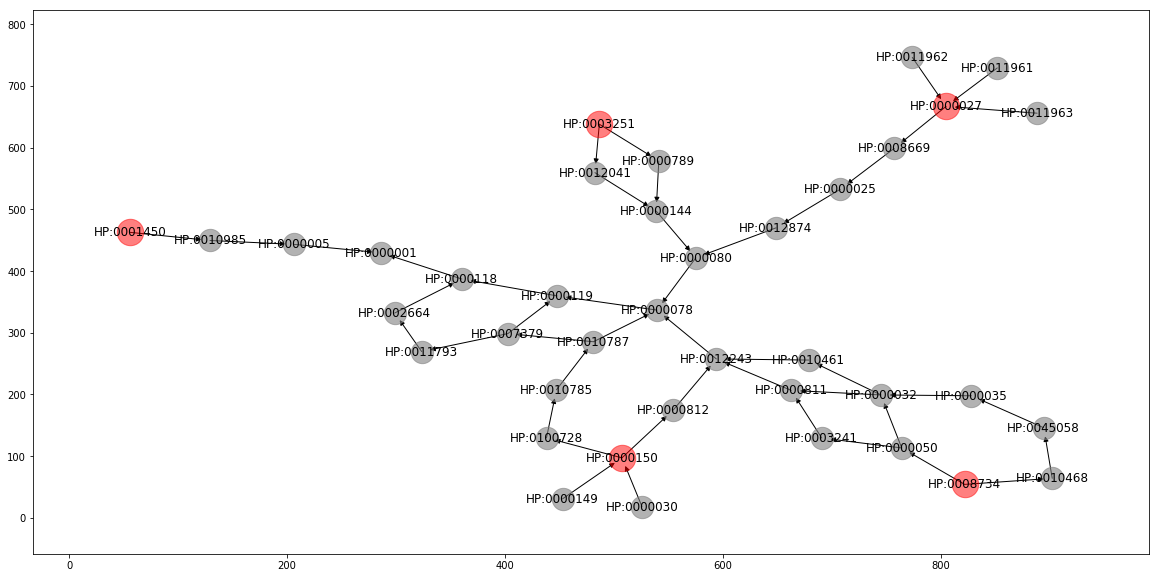

In [34]:
terms = list(gsea.enrichment_table.HPO_term_ID)
lin = LineagePlot()
fig, ax = plt.subplots(figsize=(20, 10))
lin.plot(terms, ax=ax)